In [13]:

import numpy as np
import matplotlib.pyplot as plt




## Quantum Entropy


In [16]:

# Quantum entropy calculation (von Neumann entropy)
def quantum_entropy(density_matrix):
    """Calculate von Neumann entropy from a density matrix."""
    eigenvalues = np.linalg.eigvals(density_matrix)
    eigenvalues = eigenvalues[eigenvalues > 0]  # Filter out zero eigenvalues
    return -np.sum(eigenvalues * np.log2(eigenvalues))

# Example density matrix (random Hermitian positive-definite matrix)
density_matrix = np.array([[0.5, 0.1], [0.1, 0.5]])
quantum_entropy_value = quantum_entropy(density_matrix)
print(f"Quantum Entropy: {quantum_entropy_value:.4f}")



Quantum Entropy: 0.9710



## Joint entropy


In [17]:

# Joint distribution of two events
joint_distribution = np.array([
    [0.1, 0.2],  # P(X=0, Y=0) and P(X=0, Y=1)
    [0.3, 0.4]   # P(X=1, Y=0) and P(X=1, Y=1)
])

# Calculate joint entropy
joint_entropy = -np.sum(joint_distribution * np.log2(joint_distribution[joint_distribution > 0]))
print(f"Joint Entropy: {joint_entropy:.4f} bits")



ValueError: operands could not be broadcast together with shapes (2,2) (4,) 


## Conditional Entropy


In [18]:

# P(X|Y) = P(X and Y) / P(Y)
marginal_y = np.sum(joint_distribution, axis=0)  # Marginal distribution of Y
conditional_entropy = -np.sum(
    joint_distribution * np.log2(joint_distribution / marginal_y[np.newaxis, :])
)

print(f"Conditional Entropy H(X|Y): {conditional_entropy:.4f} bits")



Conditional Entropy H(X|Y): 0.8755 bits


In [19]:

def calculate_file_entropy(file_data):
    """Calculate Shannon entropy of a binary file."""
    byte_counts = np.bincount(np.frombuffer(file_data, dtype=np.uint8), minlength=256)
    probabilities = byte_counts / len(file_data)
    probabilities = probabilities[probabilities > 0]  # Filter non-zero probabilities
    print( probabilities )
    return -np.sum(probabilities * np.log2(probabilities))

# Simulated packed malware data (low entropy binary)

packed_binary = np.random.choice([0, 1], size=1024, p=[0.8, 0.2])
entropy       = calculate_file_entropy(packed_binary.tobytes())

# Threshold for detecting packed binaries
threshold = 4.0
is_packed = entropy < threshold
print(f"Entropy: {entropy:.4f}")
print(f"Is the binary packed malware? {is_packed}")



[0.97521973 0.02478027]
Entropy: 0.1675
Is the binary packed malware? True


In [20]:

# Simulated IP addresses (categorical data)
ip_addresses = ["192.168.1.1", "192.168.1.2", "10.0.0.1", "192.168.1.1", "10.0.0.1"]
actions = ["LOGIN", "LOGOUT", "UPLOAD", "LOGIN", "UPLOAD"]

# Calculate conditional entropy H(Actions|IP)
joint_probs = {}
for ip, action in zip(ip_addresses, actions):
    joint_probs[(ip, action)] = joint_probs.get((ip, action), 0) + 1
    
joint_probs = {k: v / len(actions) for k, v in joint_probs.items()}

# Marginal probabilities of IP
marginal_probs = {}
for ip in ip_addresses:
    marginal_probs[ip] = marginal_probs.get(ip, 0) + 1
marginal_probs = {k: v / len(ip_addresses) for k, v in marginal_probs.items()}

conditional_entropy = 0
for (ip, action), p_joint in joint_probs.items():
    conditional_entropy -= p_joint * np.log2(p_joint / marginal_probs[ip])

print(f"Conditional Entropy H(Actions|IP): {conditional_entropy:.4f} bits")



Conditional Entropy H(Actions|IP): 0.0000 bits



## Sliding window and Entropy


In [21]:

# Simulated traffic packet counts per second
normal_traffic    = np.random.randint(40, 60, 100)  # Normal range
anomalous_traffic = np.append(normal_traffic, np.random.randint(500, 600, 5))  # Spike anomaly

# Sliding window entropy detection
def sliding_window_entropy(data, window_size):
    entropies = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        values, counts = np.unique(window, return_counts=True)
        probabilities = counts / len(window)
        entropies.append(-np.sum(probabilities * np.log2(probabilities)))
    return entropies

window_entropies = sliding_window_entropy(anomalous_traffic, window_size=10)
print(f"Window Entropies: {window_entropies[:5]}...")  # Display first few entropies



Window Entropies: [3.121928094887362, 3.121928094887362, 2.9219280948873623, 2.9219280948873623, 2.9219280948873623]...


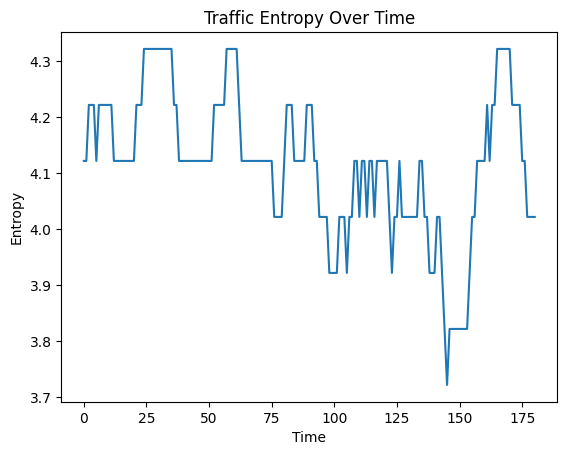

In [22]:

# Simulate network traffic
traffic = np.random.randint(1, 100, size=200)

# Calculate entropy over time
entropies = sliding_window_entropy(traffic, window_size=20)

# Visualize
plt.plot(entropies)
plt.title("Traffic Entropy Over Time")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.show()



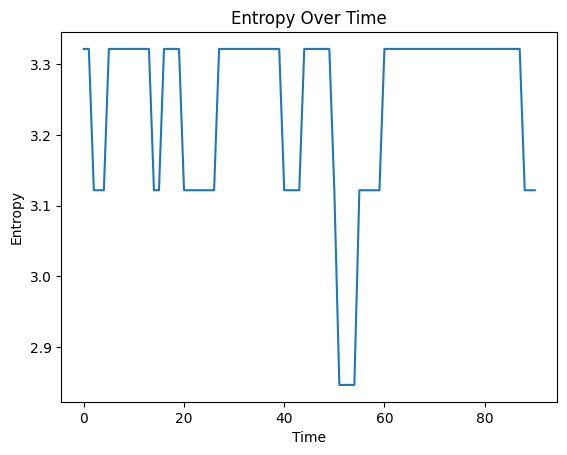

In [23]:

# Calculate entropy
def calculate_entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    return -np.sum(probabilities * np.log2(probabilities))


# Generate random data and calculate entropy over a sliding window
data = np.random.randint(1, 100, 100)
window_size = 10
entropies = [calculate_entropy(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]

# Plot entropy over time
plt.plot(entropies)
plt.title("Entropy Over Time")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.show()
